# MNIST Neural Network with Keras

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/denpalrius/AI-Machine-Learning-Practice/blob/main/neural_networks/mnist_nn.ipynb)
[![GitHub](https://img.shields.io/badge/view%20source%20on%20github-black?logo=github)](https://github.com/denpalrius/AI-Machine-Learning-Practice/blob/main/neural_networks/mnist_nn.ipynb)


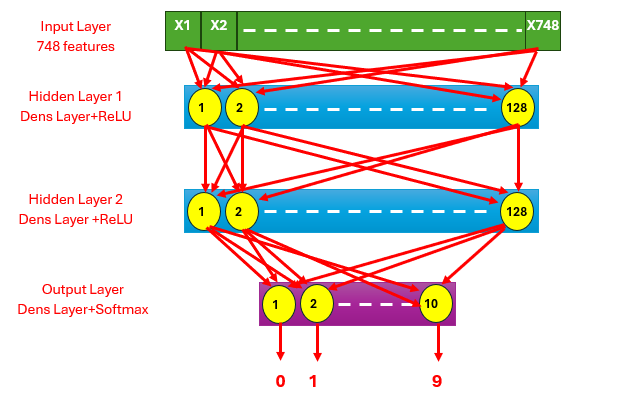


## Dependencies

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold

import keras
from keras.models import Sequential
from keras.layers import Input, BatchNormalization
from keras.layers import Dense, Dropout
from keras.datasets import mnist


## Dataset Exploration

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Visualise one sample from each of the 10 classes

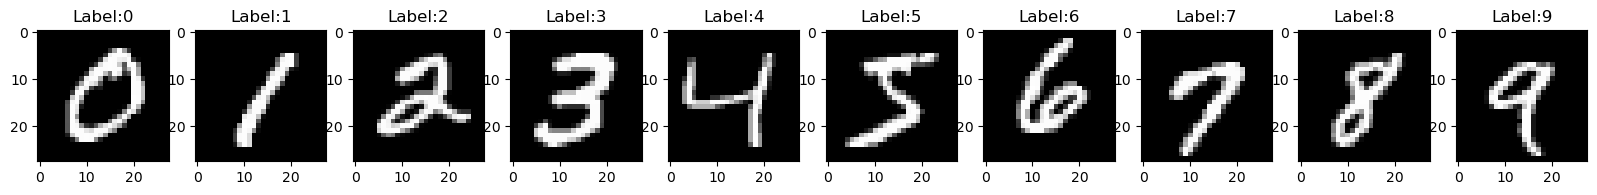

In [29]:
num_classes = 10

fig, ax = plt.subplots(1, num_classes, figsize=(20,20)) # 1 row, 10 columns (num_classes)

for i in range(num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Label:{i}")


Review a random sample of the images

In [30]:
random_index = np.random.randint(0, X_test.shape[0])

Label: 0
Image shape: (28, 28)
Image data: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  53 255 253 227
   42   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  63 221 253 251 251
  205  41   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  58 231 251 253 251 251
  251 226 166  16   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  63 231 251 251 253 251 251
  251 251 253 169  15   0   0   0   0   0]
 [  0   0   0   0   

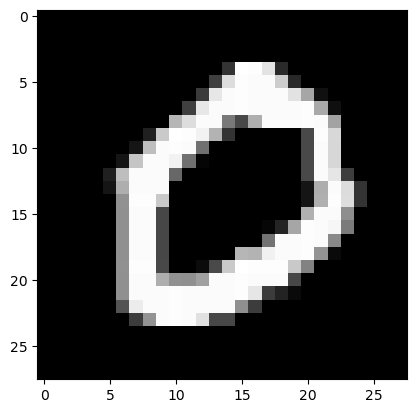

In [31]:
print(f"Label: {y_train[random_index]}")
print(f"Image shape: {X_train[random_index].shape}")
print(f"Image data: \n{X_train[random_index]}")
plt.imshow(X_train[random_index], cmap="gray");

Display count of each digit

In [32]:
_, counts = np.unique(y_train, return_counts=True)

for i in range(num_classes):
  print(f"Label {i}: {counts[i]} samples")

Label 0: 5923 samples
Label 1: 6742 samples
Label 2: 5958 samples
Label 3: 6131 samples
Label 4: 5842 samples
Label 5: 5421 samples
Label 6: 5918 samples
Label 7: 6265 samples
Label 8: 5851 samples
Label 9: 5949 samples


## Data Pre-processsing

Perform one hot encoding on the labels

In [33]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [34]:
print(f"y_train[0]: {y_train[random_index]}")
print(f"y_test[1]: {y_test[random_index]}")

y_train[0]: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_test[1]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Normalize the images ------ the pixel value range 0-255, convert it to 0-1

In [35]:
X_train = X_train/255.0
X_test = X_test/255.0

Flatten the train and test input data.
- The training and test data is a 2D image of 28x28.
- The DL model is just a dense NN or Fully connected NN. The dimension of a Dense layer is just 1D
- Reshape data from 2D(28x28) to 1D(784)

In [36]:
print(f'Shape of X_train before reshaping:\n{X_train.shape}')

Shape of X_train before reshaping:
(60000, 28, 28)


In [37]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(f'Shape of X_train after reshaping: \n{X_train.shape}')

Shape of X_train after reshaping: 
(60000, 784)


## Neural Network Architecture

**Dense Neural Network:**
- First layer has 128 nodes and activation function is ReLU.
- Second Layer is a Dense layer with  128 nodes and ReLU activation function.
- Implement Dropout (This will randamly drop some nodes in the training process to avoid overfitting).
- Last layer is a classification layer for 10 classes with softmax activation function.

In [38]:
def create_model(show_summary=True):
    model = Sequential(name="nn_model")

    model.add(Input(shape=(784,)))
    model.add(Dense(units=128, activation="relu"))
    model.add(Dense(units=128, activation="relu"))
    model.add(Dropout(0.25))
    # model.add(Dense(units=64, activation="relu"))
    model.add(Dense(units=10, activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    if show_summary:
        model.summary()

    return model

## Model Training

Create the model

In [39]:
model = create_model()

Model: "nn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

- Batch size 256
- Epochs 20

In [40]:
history = model.fit(X_train, y_train , epochs=20, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7568 - loss: 0.8118 - val_accuracy: 0.9427 - val_loss: 0.1926
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9411 - loss: 0.1993 - val_accuracy: 0.9601 - val_loss: 0.1252
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9617 - loss: 0.1306 - val_accuracy: 0.9667 - val_loss: 0.1056
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9705 - loss: 0.0990 - val_accuracy: 0.9721 - val_loss: 0.0895
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9756 - loss: 0.0794 - val_accuracy: 0.9725 - val_loss: 0.0846
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9790 - loss: 0.0682 - val_accuracy: 0.9732 - val_loss: 0.0812
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9831 - loss: 0.0547 - val_accuracy: 0.9779 - val_loss: 0.0720
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9862 - loss: 0.0440 - val_accuracy: 0.

Plot the training and validation accuracy and loss at each epoch

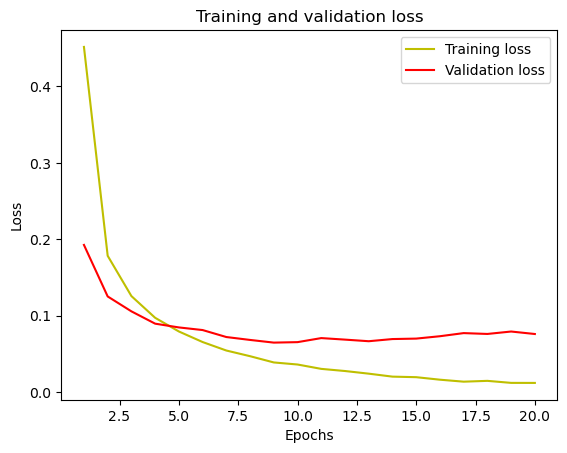

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plt.savefig('loss_curve_LR', format='jpeg')
plt.close()  # Close the plot to free up memory

### K-Fold Cross Validation

Train and validate the model using Kfold Cross Validation

In [42]:
kf = KFold(n_splits=5)
fold_no = 1
train_accuracies = []

for train_index, val_index in kf.split(X_train):
    print(f'Training fold {fold_no} ...')

    X_train2, X_val2 = X_train[train_index], X_train[val_index]
    y_train2, y_val2 = y_train[train_index], y_train[val_index]

    model = create_model(show_summary=False)
    model.fit(X_train2, y_train2, epochs=20, batch_size=512, verbose=0)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val2, y_val2, verbose=0)
    train_accuracies.append(val_accuracy)
    print(f'Fold {fold_no} - Validation Accuracy: {val_accuracy:.4f}')

    model.save(f'model_fold_{fold_no}.keras')

    fold_no += 1

Training fold 1 ...
Fold 1 - Validation Accuracy: 0.9772
Training fold 2 ...
Fold 2 - Validation Accuracy: 0.9737
Training fold 3 ...
Fold 3 - Validation Accuracy: 0.9734
Training fold 4 ...
Fold 4 - Validation Accuracy: 0.9707
Training fold 5 ...
Fold 5 - Validation Accuracy: 0.9772


Print the average accuracy across folds

In [43]:
print(f'Average Accuracy: {np.mean(train_accuracies):.4f}')

Average Accuracy: 0.9744


## Model Evaluation

In [44]:
test_accuracies = []

for fold in range(1, 6):
    model = keras.models.load_model(f'model_fold_{fold}.keras')
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies.append(test_accuracy)
    
    print(f'Test Accuracy for Fold {fold}: {test_accuracy:.4f}')

Test Accuracy for Fold 1: 0.9787
Test Accuracy for Fold 2: 0.9765
Test Accuracy for Fold 3: 0.9746
Test Accuracy for Fold 4: 0.9775
Test Accuracy for Fold 5: 0.9782


Predict labels on test data

In [45]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) # pick the highest probability with "np.argmax()", and turn it into an index uing "axis=1"

# save true label of this sample in a variable
y_true = np.argmax(y_test, axis=1)


print(f'y_pred_classes[1340]: {y_pred_classes[1340]}')
print(f'y_pred[1340]: {y_pred[1340]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
y_pred_classes[1340]: 5
y_pred[1340]: [1.1873609e-09 4.4866741e-08 3.4890711e-08 8.5466672e-07 1.0461658e-11
 9.9998665e-01 6.3047100e-06 7.5293377e-10 6.2014146e-06 8.7348058e-09]


Evaluate the Classifier using Confusion Matrix

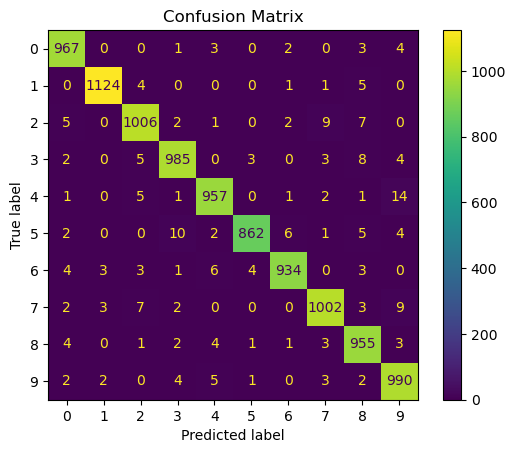

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [46]:
cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(num_classes)])
disp.plot(cmap="viridis", values_format="d")
plt.title('Confusion Matrix')
plt.show()
plt.close